In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [67]:
cricket_data = pd.read_csv('cricket_data.csv.csv')

In [68]:
cricket_data

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format
0,India,Pakistan,drawn,NaN,Bengaluru,"Dec 8-12, 2007",Test # 1852,Test
1,India,Pakistan,drawn,NaN,Eden Gardens,"Nov 30-Dec 4, 2007",Test # 1850,Test
2,India,Pakistan,India,6 wickets,Delhi,"Nov 22-26, 2007",Test # 1849,Test
3,Pakistan,India,Pakistan,341 runs,Karachi,"Jan 29-Feb 1, 2006",Test # 1783,Test
4,Pakistan,India,drawn,NaN,Faisalabad,"Jan 21-25, 2006",Test # 1782,Test
...,...,...,...,...,...,...,...,...
7788,Australia,ICC World XI,Australia,210 runs,Sydney,"Oct 14-17, 2005",Test # 1768,Test
7789,Australia,ICC World XI,Australia,156 runs,Melbourne (Docklands),"Oct 9, 2005",ODI # 2284,ODI
7790,Australia,ICC World XI,Australia,55 runs,Melbourne (Docklands),"Oct 7, 2005",ODI # 2283,ODI
7791,Australia,ICC World XI,Australia,93 runs,Melbourne (Docklands),"Oct 5, 2005",ODI # 2282,ODI


In [69]:
cricket_data = cricket_data.dropna()

In [70]:
cricket_data = cricket_data.loc[cricket_data['Format'] == 'Test ', :]

In [71]:
cricket_data['Match Date']

2          Nov 22-26, 2007
3       Jan 29-Feb 1, 2006
6          Mar 24-28, 2005
7          Mar 16-20, 2005
9          Apr 13-16, 2004
               ...        
7729       Nov 12-16, 2003
7732       Jul 19-22, 2001
7733       Mar 24-28, 2000
7734       Mar 16-20, 2000
7788       Oct 14-17, 2005
Name: Match Date, Length: 1787, dtype: object

In [72]:
cricket_data['Match Date'].str.contains("2000")

2       False
3       False
6       False
7       False
9       False
        ...  
7729    False
7732    False
7733     True
7734     True
7788    False
Name: Match Date, Length: 1787, dtype: bool

In [73]:
cricket_data['Year'] = cricket_data['Match Date'].str[-4:]

In [74]:
cricket_data

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format,Year
2,India,Pakistan,India,6 wickets,Delhi,"Nov 22-26, 2007",Test # 1849,Test,2007
3,Pakistan,India,Pakistan,341 runs,Karachi,"Jan 29-Feb 1, 2006",Test # 1783,Test,2006
6,India,Pakistan,Pakistan,168 runs,Bengaluru,"Mar 24-28, 2005",Test # 1743,Test,2005
7,India,Pakistan,India,195 runs,Eden Gardens,"Mar 16-20, 2005",Test # 1741,Test,2005
9,Pakistan,India,India,inns & 131 runs,Rawalpindi,"Apr 13-16, 2004",Test # 1697,Test,2004
...,...,...,...,...,...,...,...,...,...
7729,Zimbabwe,West Indies,West Indies,128 runs,Bulawayo,"Nov 12-16, 2003",Test # 1669,Test,2003
7732,Zimbabwe,West Indies,West Indies,inns & 176 runs,Bulawayo,"Jul 19-22, 2001",Test # 1551,Test,2001
7733,West Indies,Zimbabwe,West Indies,10 wickets,Kingston,"Mar 24-28, 2000",Test # 1492,Test,2000
7734,West Indies,Zimbabwe,West Indies,35 runs,Port of Spain,"Mar 16-20, 2000",Test # 1490,Test,2000


In [75]:
cricket_data

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format,Year
2,India,Pakistan,India,6 wickets,Delhi,"Nov 22-26, 2007",Test # 1849,Test,2007
3,Pakistan,India,Pakistan,341 runs,Karachi,"Jan 29-Feb 1, 2006",Test # 1783,Test,2006
6,India,Pakistan,Pakistan,168 runs,Bengaluru,"Mar 24-28, 2005",Test # 1743,Test,2005
7,India,Pakistan,India,195 runs,Eden Gardens,"Mar 16-20, 2005",Test # 1741,Test,2005
9,Pakistan,India,India,inns & 131 runs,Rawalpindi,"Apr 13-16, 2004",Test # 1697,Test,2004
...,...,...,...,...,...,...,...,...,...
7729,Zimbabwe,West Indies,West Indies,128 runs,Bulawayo,"Nov 12-16, 2003",Test # 1669,Test,2003
7732,Zimbabwe,West Indies,West Indies,inns & 176 runs,Bulawayo,"Jul 19-22, 2001",Test # 1551,Test,2001
7733,West Indies,Zimbabwe,West Indies,10 wickets,Kingston,"Mar 24-28, 2000",Test # 1492,Test,2000
7734,West Indies,Zimbabwe,West Indies,35 runs,Port of Spain,"Mar 16-20, 2000",Test # 1490,Test,2000


In [76]:
cricket_data['Year'] = pd.to_datetime(cricket_data['Year'])


In [77]:
cricket_data['year_only'] = cricket_data['Year'].dt.year

In [78]:
cricket_data

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format,Year,year_only
2,India,Pakistan,India,6 wickets,Delhi,"Nov 22-26, 2007",Test # 1849,Test,2007-01-01,2007
3,Pakistan,India,Pakistan,341 runs,Karachi,"Jan 29-Feb 1, 2006",Test # 1783,Test,2006-01-01,2006
6,India,Pakistan,Pakistan,168 runs,Bengaluru,"Mar 24-28, 2005",Test # 1743,Test,2005-01-01,2005
7,India,Pakistan,India,195 runs,Eden Gardens,"Mar 16-20, 2005",Test # 1741,Test,2005-01-01,2005
9,Pakistan,India,India,inns & 131 runs,Rawalpindi,"Apr 13-16, 2004",Test # 1697,Test,2004-01-01,2004
...,...,...,...,...,...,...,...,...,...,...
7729,Zimbabwe,West Indies,West Indies,128 runs,Bulawayo,"Nov 12-16, 2003",Test # 1669,Test,2003-01-01,2003
7732,Zimbabwe,West Indies,West Indies,inns & 176 runs,Bulawayo,"Jul 19-22, 2001",Test # 1551,Test,2001-01-01,2001
7733,West Indies,Zimbabwe,West Indies,10 wickets,Kingston,"Mar 24-28, 2000",Test # 1492,Test,2000-01-01,2000
7734,West Indies,Zimbabwe,West Indies,35 runs,Port of Spain,"Mar 16-20, 2000",Test # 1490,Test,2000-01-01,2000


In [79]:
cricket_data = cricket_data.sort_values(by='year_only')

In [80]:
cricket_data

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format,Year,year_only
3944,Australia,England,England,4 wickets,Melbourne,"Mar 31-Apr 4, 1877",Test # 2,Test,1877-01-01,1877
3945,Australia,England,Australia,45 runs,Melbourne,"Mar 15-19, 1877",Test # 1,Test,1877-01-01,1877
3943,Australia,England,Australia,10 wickets,Melbourne,"Jan 2-4, 1879",Test # 3,Test,1879-01-01,1879
3942,England,Australia,England,5 wickets,The Oval,"Sep 6-8, 1880",Test # 4,Test,1880-01-01,1880
3939,Australia,England,Australia,6 wickets,Sydney,"Mar 3-7, 1882",Test # 7,Test,1882-01-01,1882
...,...,...,...,...,...,...,...,...,...,...
971,South Africa,Pakistan,South Africa,10 wickets,Cape Town,"Jan 3-6, 2025",Test # 2576,Test,2025-01-01,2025
4601,Sri Lanka,Australia,Australia,inns & 242 runs,Galle,"Jan 29-Feb 1, 2025",Test # 2579,Test,2025-01-01,2025
4600,Sri Lanka,Australia,Australia,9 wickets,Galle,"Feb 6-9, 2025",Test # 2580,Test,2025-01-01,2025
3493,Zimbabwe,Afghanistan,Afghanistan,72 runs,Bulawayo,"Jan 2-6, 2025",Test # 2574,Test,2025-01-01,2025


In [81]:
cricket_data['Victory Type'] = np.where(cricket_data['Margin'].str.contains("wickets", na=False), cricket_data['Margin'], np.nan)

In [82]:
cricket_data['Victory Type'] = cricket_data['Victory Type'].replace('NaN', 'Runs', regex=True)
cricket_data['Victory Type'] = cricket_data['Victory Type'].fillna('Runs')

In [83]:
cricket_data.loc[cricket_data['Victory Type'].str.contains("wickets"), 'Victory Type'] = "Wickets"

In [84]:
#Re-formatting Scorecard to show just the number (we can sort it by date that way)
cricket_data['Scorecard'] = cricket_data['Scorecard'].apply(lambda x: int(x.replace('Test #', '')))
#Sorting by date (order of scorecard variable)
cricket_data = cricket_data.sort_values('Scorecard', ascending=True)
cricket_data.head(10)

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format,Year,year_only,Victory Type
3945,Australia,England,Australia,45 runs,Melbourne,"Mar 15-19, 1877",1,Test,1877-01-01,1877,Runs
3944,Australia,England,England,4 wickets,Melbourne,"Mar 31-Apr 4, 1877",2,Test,1877-01-01,1877,Wickets
3943,Australia,England,Australia,10 wickets,Melbourne,"Jan 2-4, 1879",3,Test,1879-01-01,1879,Wickets
3942,England,Australia,England,5 wickets,The Oval,"Sep 6-8, 1880",4,Test,1880-01-01,1880,Wickets
3940,Australia,England,Australia,5 wickets,Sydney,"Feb 17-21, 1882",6,Test,1882-01-01,1882,Wickets
3939,Australia,England,Australia,6 wickets,Sydney,"Mar 3-7, 1882",7,Test,1882-01-01,1882,Wickets
3937,England,Australia,Australia,7 runs,The Oval,"Aug 28-29, 1882",9,Test,1882-01-01,1882,Runs
3936,Australia,England,Australia,9 wickets,Melbourne,"Dec 30, 1882 - Jan 2, 1883",10,Test,1883-01-01,1883,Wickets
3935,Australia,England,England,inns & 27 runs,Melbourne,"Jan 19-22, 1883",11,Test,1883-01-01,1883,Runs
3934,Australia,England,England,69 runs,Sydney,"Jan 26-30, 1883",12,Test,1883-01-01,1883,Runs


In [85]:
# Create a DataFrame to store individual team results for easier rolling calculations
team_results_list = []
for index, row in cricket_data.iterrows():
    # Home Team's perspective
    team_results_list.append({
        'Year': row["Year"],
        'Scorecard': row['Scorecard'],
        'Team': row['Team 1'],
        'IsHome': 1,
        'Result': 1 if row['Winner'] == row['Team 1'] else 0  # 1 for win, 0 for loss
    })
    # Away Team's perspective
    team_results_list.append({
        'Year': row["Year"],
        'Scorecard': row['Scorecard'],
        'Team': row['Team 2'],
        'IsHome': 0,
        'Result': 1 if row['Winner'] == row['Team 2'] else 0  # 1 for win, 0 for loss
    })

team_results = pd.DataFrame(team_results_list)
team_results = team_results.sort_values(by=['Scorecard']).reset_index(drop=True)
team_results.head(10)
team_results['RollingForm'] = team_results.groupby('Team')['Result'].transform(
    lambda x: x.rolling(window=5, min_periods=1).mean().shift(1))

# Fill NaN values (for teams with fewer than 5 prior matches) with a default (0.5 for average form)
team_results['RollingForm'] = team_results['RollingForm'].fillna(0.5)
team_results

,Year,Scorecard,Team,IsHome,Result,RollingForm
0,1877-01-01,1,Australia,1,1,0.5
1,1877-01-01,1,England,0,0,0.5
2,1877-01-01,2,Australia,1,0,1.0
3,1877-01-01,2,England,0,1,0.0
4,1879-01-01,3,Australia,1,1,0.5
...,...,...,...,...,...,...
3569,2025-01-01,2579,Australia,0,1,0.8
3570,2025-01-01,2580,Sri Lanka,1,0,0.4
3571,2025-01-01,2580,Australia,0,1,0.8
3572,2025-01-01,2581,Zimbabwe,1,0,0.0


In [86]:
home_form = team_results[team_results['IsHome'] == 1].rename(columns={'Team': 'Team 1', 'RollingForm': 'HomeTeamForm'})[['Scorecard', 'Team 1', 'HomeTeamForm']]
away_form = team_results[team_results['IsHome'] == 0].rename(columns={'Team': 'Team 2', 'RollingForm': 'AwayTeamForm'})[['Scorecard', 'Team 2', 'AwayTeamForm']]

home_form

,Scorecard,Team 1,HomeTeamForm
0,1,Australia,0.500000
2,2,Australia,1.000000
4,3,Australia,0.500000
6,4,England,0.333333
8,6,Australia,0.500000
...,...,...,...
3564,2577,Pakistan,0.400000
3566,2578,Pakistan,0.600000
3568,2579,Sri Lanka,0.600000
3570,2580,Sri Lanka,0.400000


In [87]:
#Merging above dataframes with the main dataframe (test_data)
cricket_data = pd.merge(cricket_data, home_form, on=['Scorecard', 'Team 1'], how='left')
cricket_data = pd.merge(cricket_data, away_form, on=['Scorecard', 'Team 2'], how='left')

cricket_data

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format,Year,year_only,Victory Type,HomeTeamForm,AwayTeamForm
0,Australia,England,Australia,45 runs,Melbourne,"Mar 15-19, 1877",1,Test,1877-01-01,1877,Runs,0.500000,0.500000
1,Australia,England,England,4 wickets,Melbourne,"Mar 31-Apr 4, 1877",2,Test,1877-01-01,1877,Wickets,1.000000,0.000000
2,Australia,England,Australia,10 wickets,Melbourne,"Jan 2-4, 1879",3,Test,1879-01-01,1879,Wickets,0.500000,0.500000
3,England,Australia,England,5 wickets,The Oval,"Sep 6-8, 1880",4,Test,1880-01-01,1880,Wickets,0.333333,0.666667
4,Australia,England,Australia,5 wickets,Sydney,"Feb 17-21, 1882",6,Test,1882-01-01,1882,Wickets,0.500000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1782,Pakistan,West Indies,Pakistan,127 runs,Multan,"Jan 17-19, 2025",2577,Test,2025-01-01,2025,Runs,0.400000,0.200000
1783,Pakistan,West Indies,West Indies,120 runs,Multan,"Jan 25-27, 2025",2578,Test,2025-01-01,2025,Runs,0.600000,0.200000
1784,Sri Lanka,Australia,Australia,inns & 242 runs,Galle,"Jan 29-Feb 1, 2025",2579,Test,2025-01-01,2025,Runs,0.600000,0.800000
1785,Sri Lanka,Australia,Australia,9 wickets,Galle,"Feb 6-9, 2025",2580,Test,2025-01-01,2025,Wickets,0.400000,0.800000


In [88]:
start_date = 2020  # Start date of your range
end_date = 2025    # End date of your range

decade2020 = cricket_data.loc[(cricket_data['year_only'] >= start_date) & (cricket_data['year_only'] <= end_date)]


In [89]:
decade2020

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format,Year,year_only,Victory Type,HomeTeamForm,AwayTeamForm
1609,Australia,New Zealand,Australia,279 runs,Sydney,"Jan 3-6, 2020",2378,Test,2020-01-01,2020,Runs,0.8,0.4
1610,South Africa,England,England,189 runs,Cape Town,"Jan 3-7, 2020",2379,Test,2020-01-01,2020,Runs,0.2,0.4
1611,South Africa,England,England,inns & 53 runs,Gqeberha,"Jan 16-20, 2020",2380,Test,2020-01-01,2020,Runs,0.2,0.4
1612,Zimbabwe,Sri Lanka,Sri Lanka,10 wickets,Harare,"Jan 19-23, 2020",2381,Test,2020-01-01,2020,Wickets,0.2,0.6
1613,South Africa,England,England,191 runs,Johannesburg,"Jan 24-27, 2020",2382,Test,2020-01-01,2020,Runs,0.2,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1782,Pakistan,West Indies,Pakistan,127 runs,Multan,"Jan 17-19, 2025",2577,Test,2025-01-01,2025,Runs,0.4,0.2
1783,Pakistan,West Indies,West Indies,120 runs,Multan,"Jan 25-27, 2025",2578,Test,2025-01-01,2025,Runs,0.6,0.2
1784,Sri Lanka,Australia,Australia,inns & 242 runs,Galle,"Jan 29-Feb 1, 2025",2579,Test,2025-01-01,2025,Runs,0.6,0.8
1785,Sri Lanka,Australia,Australia,9 wickets,Galle,"Feb 6-9, 2025",2580,Test,2025-01-01,2025,Wickets,0.4,0.8


In [90]:
start_date = 2010  # Start date of your range
end_date = 2019  # End date of your range

decade2010 = cricket_data.loc[(cricket_data['year_only'] >= start_date) & (cricket_data['year_only'] <= end_date)]

In [91]:
decade2010

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format,Year,year_only,Victory Type,HomeTeamForm,AwayTeamForm
1260,Australia,Pakistan,Australia,36 runs,Sydney,"Jan 3-6, 2010",1945,Test,2010-01-01,2010,Runs,0.8,0.2
1261,Australia,Pakistan,Australia,231 runs,Hobart,"Jan 14-18, 2010",1947,Test,2010-01-01,2010,Runs,0.8,0.2
1262,South Africa,England,South Africa,inns & 74 runs,Johannesburg,"Jan 14-17, 2010",1948,Test,2010-01-01,2010,Runs,0.2,0.8
1263,Bangladesh,India,India,113 runs,Chattogram,"Jan 17-21, 2010",1949,Test,2010-01-01,2010,Runs,0.4,1.0
1264,Bangladesh,India,India,10 wickets,Mirpur,"Jan 24-27, 2010",1950,Test,2010-01-01,2010,Wickets,0.4,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1604,Australia,Pakistan,Australia,inns & 48 runs,Adelaide,"Nov 29-Dec 2, 2019",2372,Test,2019-01-01,2019,Runs,0.6,0.0
1605,Australia,New Zealand,Australia,296 runs,Perth,"Dec 12-15, 2019",2374,Test,2019-01-01,2019,Runs,0.6,0.8
1606,Pakistan,Sri Lanka,Pakistan,263 runs,Karachi,"Dec 19-23, 2019",2375,Test,2019-01-01,2019,Runs,0.0,0.6
1607,Australia,New Zealand,Australia,247 runs,Melbourne,"Dec 26-29, 2019",2376,Test,2019-01-01,2019,Runs,0.8,0.6


In [92]:
start_date = 2000  # Start date of your range
end_date = 2009  # End date of your range

decade2000 = cricket_data.loc[(cricket_data['year_only'] >= start_date) & (cricket_data['year_only'] <= end_date)]

decade2000

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format,Year,year_only,Victory Type,HomeTeamForm,AwayTeamForm
911,Australia,India,Australia,inns & 141 runs,Sydney,"Jan 2-4, 2000",1481,Test,2000-01-01,2000,Runs,1.0,0.4
912,South Africa,England,South Africa,inns & 37 runs,Cape Town,"Jan 2-5, 2000",1482,Test,2000-01-01,2000,Runs,1.0,0.2
913,South Africa,England,England,2 wickets,Centurion,"Jan 14-18, 2000",1483,Test,2000-01-01,2000,Wickets,1.0,0.2
914,India,South Africa,South Africa,4 wickets,Wankhede,"Feb 24-26, 2000",1484,Test,2000-01-01,2000,Wickets,0.2,0.8
915,Pakistan,Sri Lanka,Sri Lanka,2 wickets,Rawalpindi,"Feb 26-Mar 1, 2000",1485,Test,2000-01-01,2000,Wickets,0.4,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,India,Sri Lanka,India,inns & 24 runs,Brabourne,"Dec 2-6, 2009",1937,Test,2009-01-01,2009,Runs,1.0,0.8
1256,New Zealand,Pakistan,Pakistan,141 runs,Wellington,"Dec 3-6, 2009",1938,Test,2009-01-01,2009,Runs,0.2,0.0
1257,Australia,West Indies,Australia,35 runs,W.A.C.A,"Dec 16-20, 2009",1941,Test,2009-01-01,2009,Runs,0.4,0.0
1258,Australia,Pakistan,Australia,170 runs,Melbourne,"Dec 26-30, 2009",1943,Test,2009-01-01,2009,Runs,0.6,0.2


In [93]:
start_date = 1990  # Start date of your range
end_date = 1999  # End date of your range

decade1990 = cricket_data.loc[(cricket_data['year_only'] >= start_date) & (cricket_data['year_only'] <= end_date)]

decade1990

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format,Year,year_only,Victory Type,HomeTeamForm,AwayTeamForm
688,Australia,Pakistan,Australia,92 runs,Melbourne,"Jan 12-16, 1990",1134,Test,1990-01-01,1990,Runs,1.0,0.8
689,New Zealand,India,New Zealand,10 wickets,Christchurch,"Feb 2-5, 1990",1136,Test,1990-01-01,1990,Wickets,0.4,0.2
690,West Indies,England,England,9 wickets,Kingston,"Feb 24-Mar 1, 1990",1140,Test,1990-01-01,1990,Wickets,0.8,0.2
691,New Zealand,Australia,New Zealand,9 wickets,Wellington,"Mar 15-19, 1990",1141,Test,1990-01-01,1990,Wickets,0.4,1.0
692,West Indies,England,West Indies,164 runs,Bridgetown,"Apr 5-10, 1990",1143,Test,1990-01-01,1990,Runs,0.6,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,Zimbabwe,Sri Lanka,Sri Lanka,6 wickets,Harare,"Nov 26-30, 1999",1473,Test,1999-01-01,1999,Wickets,0.4,0.8
907,Australia,India,Australia,285 runs,Adelaide,"Dec 10-14, 1999",1476,Test,1999-01-01,1999,Runs,0.8,0.4
908,New Zealand,West Indies,New Zealand,9 wickets,Hamilton,"Dec 16-20, 1999",1477,Test,1999-01-01,1999,Wickets,0.4,0.4
909,New Zealand,West Indies,New Zealand,inns & 105 runs,Wellington,"Dec 26-29, 1999",1478,Test,1999-01-01,1999,Runs,0.6,0.4


In [94]:
start_date = 1980  # Start date of your range
end_date = 1989  # End date of your range

decade1980 = cricket_data.loc[(cricket_data['year_only'] >= start_date) & (cricket_data['year_only'] <= end_date)]

decade1980

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format,Year,year_only,Victory Type,HomeTeamForm,AwayTeamForm
544,Australia,West Indies,West Indies,10 wickets,Melbourne,"Dec 29, 1979 - Jan 1, 1980",867,Test,1980-01-01,1980,Wickets,0.4,0.6
545,Australia,England,Australia,6 wickets,Sydney,"Jan 4-8, 1980",868,Test,1980-01-01,1980,Wickets,0.4,0.8
546,India,Pakistan,India,10 wickets,Chennai,"Jan 15-20, 1980",869,Test,1980-01-01,1980,Wickets,0.8,0.6
547,Australia,West Indies,West Indies,408 runs,Adelaide,"Jan 26-30, 1980",870,Test,1980-01-01,1980,Runs,0.4,0.6
548,Australia,England,Australia,8 wickets,Melbourne,"Feb 1-6, 1980",872,Test,1980-01-01,1980,Wickets,0.4,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,England,Australia,Australia,210 runs,Leeds,"Jun 8-13, 1989",1121,Test,1989-01-01,1989,Runs,0.2,0.2
684,England,Australia,Australia,6 wickets,Lord's,"Jun 22-27, 1989",1122,Test,1989-01-01,1989,Wickets,0.2,0.4
685,England,Australia,Australia,9 wickets,Manchester,"Jul 27-Aug 1, 1989",1124,Test,1989-01-01,1989,Wickets,0.2,0.6
686,England,Australia,Australia,inns & 180 runs,Nottingham,"Aug 10-14, 1989",1125,Test,1989-01-01,1989,Runs,0.2,0.8


In [95]:
start_date = 1970  # Start date of your range
end_date = 1979  # End date of your range

decade1970 = cricket_data.loc[(cricket_data['year_only'] >= start_date) & (cricket_data['year_only'] <= end_date)]

decade1970

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format,Year,year_only,Victory Type,HomeTeamForm,AwayTeamForm
431,South Africa,Australia,South Africa,170 runs,Cape Town,"Jan 22-27, 1970",670,Test,1970-01-01,1970,Runs,0.8,0.8
432,South Africa,Australia,South Africa,inns & 129 runs,Durban,"Feb 5-9, 1970",671,Test,1970-01-01,1970,Runs,0.8,0.6
433,South Africa,Australia,South Africa,307 runs,Johannesburg,"Feb 19-24, 1970",672,Test,1970-01-01,1970,Runs,0.8,0.4
434,South Africa,Australia,South Africa,323 runs,Gqeberha,"Mar 5-10, 1970",673,Test,1970-01-01,1970,Runs,1.0,0.4
435,Australia,England,England,299 runs,Sydney,"Jan 9-14, 1971",676,Test,1971-01-01,1971,Runs,0.2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,England,India,England,inns & 83 runs,Birmingham,"Jul 12-16, 1979",851,Test,1979-01-01,1979,Runs,0.8,0.4
540,India,Australia,India,153 runs,Kanpur,"Oct 2-7, 1979",857,Test,1979-01-01,1979,Runs,0.2,0.2
541,India,Australia,India,inns & 100 runs,Wankhede,"Nov 3-7, 1979",860,Test,1979-01-01,1979,Runs,0.4,0.2
542,Australia,England,Australia,138 runs,W.A.C.A,"Dec 14-19, 1979",864,Test,1979-01-01,1979,Runs,0.2,0.8


In [96]:
start_date = 1960  # Start date of your range
end_date = 1969  # End date of your range

decade1960 = cricket_data.loc[(cricket_data['year_only'] >= start_date) & (cricket_data['year_only'] <= end_date)]

decade1960

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format,Year,year_only,Victory Type,HomeTeamForm,AwayTeamForm
334,India,Australia,Australia,inns & 55 runs,Chennai,"Jan 13-17, 1960",486,Test,1960-01-01,1960,Runs,0.2,0.8
335,West Indies,England,England,256 runs,Port of Spain,"Jan 28-Feb 3, 1960",488,Test,1960-01-01,1960,Runs,0.6,1.0
336,England,South Africa,England,100 runs,Birmingham,"Jun 9-14, 1960",492,Test,1960-01-01,1960,Runs,1.0,0.4
337,England,South Africa,England,inns & 73 runs,Lord's,"Jun 23-27, 1960",493,Test,1960-01-01,1960,Runs,1.0,0.2
338,England,South Africa,England,8 wickets,Nottingham,"Jul 7-11, 1960",494,Test,1960-01-01,1960,Wickets,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,Pakistan,New Zealand,New Zealand,5 wickets,Lahore,"Oct 30-Nov 2, 1969",663,Test,1969-01-01,1969,Wickets,0.4,0.4
427,India,Australia,Australia,8 wickets,Brabourne,"Nov 4-9, 1969",664,Test,1969-01-01,1969,Wickets,0.6,0.6
428,India,Australia,India,7 wickets,Delhi,"Nov 28-Dec 2, 1969",667,Test,1969-01-01,1969,Wickets,0.6,0.8
429,India,Australia,Australia,10 wickets,Eden Gardens,"Dec 12-16, 1969",668,Test,1969-01-01,1969,Wickets,0.6,0.8


In [97]:
start_date = 1950  # Start date of your range
end_date = 1959  # End date of your range

decade1950 = cricket_data.loc[(cricket_data['year_only'] >= start_date) & (cricket_data['year_only'] <= end_date)]

decade1950

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format,Year,year_only,Victory Type,HomeTeamForm,AwayTeamForm
220,South Africa,Australia,Australia,8 wickets,Cape Town,"Dec 31, 1949 - Jan 4, 1950",319,Test,1950-01-01,1950,Wickets,0.0,1.0
221,South Africa,Australia,Australia,5 wickets,Durban,"Jan 20-24, 1950",320,Test,1950-01-01,1950,Wickets,0.0,1.0
222,South Africa,Australia,Australia,inns & 259 runs,Gqeberha,"Mar 3-6, 1950",322,Test,1950-01-01,1950,Runs,0.0,1.0
223,England,West Indies,England,202 runs,Manchester,"Jun 8-12, 1950",323,Test,1950-01-01,1950,Runs,0.4,0.8
224,England,West Indies,West Indies,326 runs,Lord's,"Jun 24-29, 1950",324,Test,1950-01-01,1950,Runs,0.6,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,England,India,England,inns & 27 runs,The Oval,"Aug 20-24, 1959",478,Test,1959-01-01,1959,Runs,1.0,0.0
330,Pakistan,Australia,Australia,8 wickets,Dhaka,"Nov 13-18, 1959",479,Test,1959-01-01,1959,Wickets,0.6,1.0
331,Pakistan,Australia,Australia,7 wickets,Lahore,"Nov 21-26, 1959",480,Test,1959-01-01,1959,Wickets,0.6,1.0
332,India,Australia,Australia,inns & 127 runs,Delhi,"Dec 12-16, 1959",482,Test,1959-01-01,1959,Runs,0.0,1.0


In [98]:
start_date = 2000  # Start date of your range
end_date = 2025  # End date of your range

modern = cricket_data.loc[(cricket_data['year_only'] >= start_date) & (cricket_data['year_only'] <= end_date)]

modern

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format,Year,year_only,Victory Type,HomeTeamForm,AwayTeamForm
911,Australia,India,Australia,inns & 141 runs,Sydney,"Jan 2-4, 2000",1481,Test,2000-01-01,2000,Runs,1.0,0.4
912,South Africa,England,South Africa,inns & 37 runs,Cape Town,"Jan 2-5, 2000",1482,Test,2000-01-01,2000,Runs,1.0,0.2
913,South Africa,England,England,2 wickets,Centurion,"Jan 14-18, 2000",1483,Test,2000-01-01,2000,Wickets,1.0,0.2
914,India,South Africa,South Africa,4 wickets,Wankhede,"Feb 24-26, 2000",1484,Test,2000-01-01,2000,Wickets,0.2,0.8
915,Pakistan,Sri Lanka,Sri Lanka,2 wickets,Rawalpindi,"Feb 26-Mar 1, 2000",1485,Test,2000-01-01,2000,Wickets,0.4,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1782,Pakistan,West Indies,Pakistan,127 runs,Multan,"Jan 17-19, 2025",2577,Test,2025-01-01,2025,Runs,0.4,0.2
1783,Pakistan,West Indies,West Indies,120 runs,Multan,"Jan 25-27, 2025",2578,Test,2025-01-01,2025,Runs,0.6,0.2
1784,Sri Lanka,Australia,Australia,inns & 242 runs,Galle,"Jan 29-Feb 1, 2025",2579,Test,2025-01-01,2025,Runs,0.6,0.8
1785,Sri Lanka,Australia,Australia,9 wickets,Galle,"Feb 6-9, 2025",2580,Test,2025-01-01,2025,Wickets,0.4,0.8


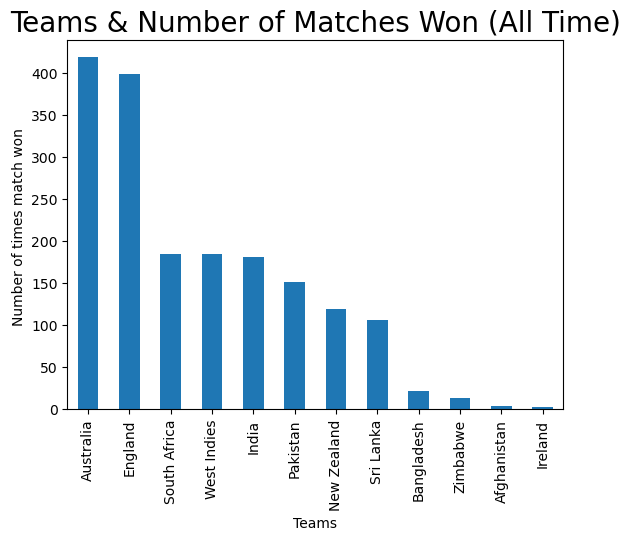

In [99]:
cricket_data["Winner"].value_counts().plot(kind = "bar")
plt.xlabel("Teams")
plt.ylabel("Number of times match won ")
plt.title("Teams & Number of Matches Won (All Time)", fontsize = 20)
plt.show()

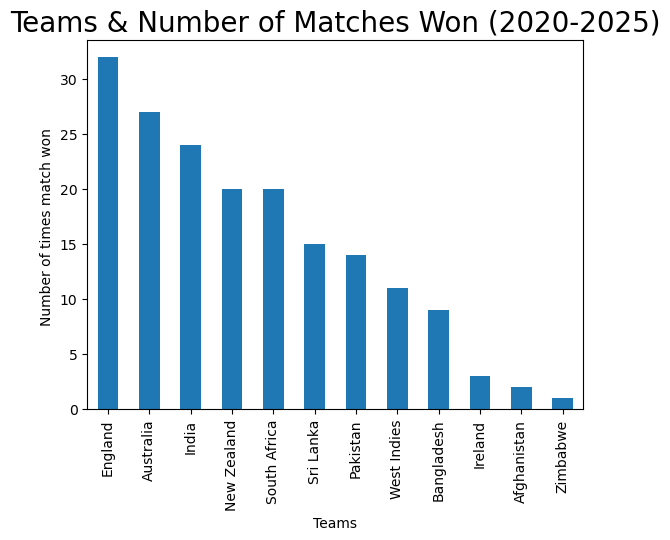

In [100]:
decade2020["Winner"].value_counts().plot(kind = "bar")
plt.xlabel("Teams")
plt.ylabel("Number of times match won ")
plt.title("Teams & Number of Matches Won (2020-2025)", fontsize = 20)
plt.show()


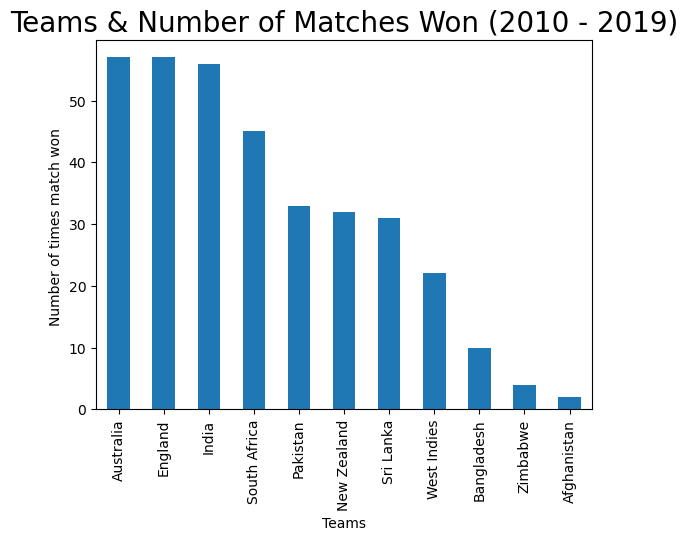

In [101]:
decade2010["Winner"].value_counts().plot(kind = "bar")
plt.xlabel("Teams")
plt.ylabel("Number of times match won ")
plt.title("Teams & Number of Matches Won (2010 - 2019)", fontsize = 20)
plt.show()

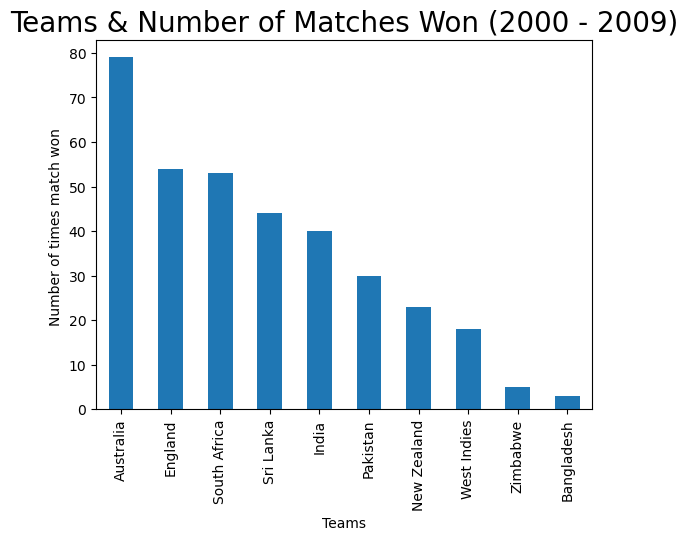

In [102]:
decade2000["Winner"].value_counts().plot(kind = "bar")
plt.xlabel("Teams")
plt.ylabel("Number of times match won ")
plt.title("Teams & Number of Matches Won (2000 - 2009)", fontsize = 20)
plt.show()

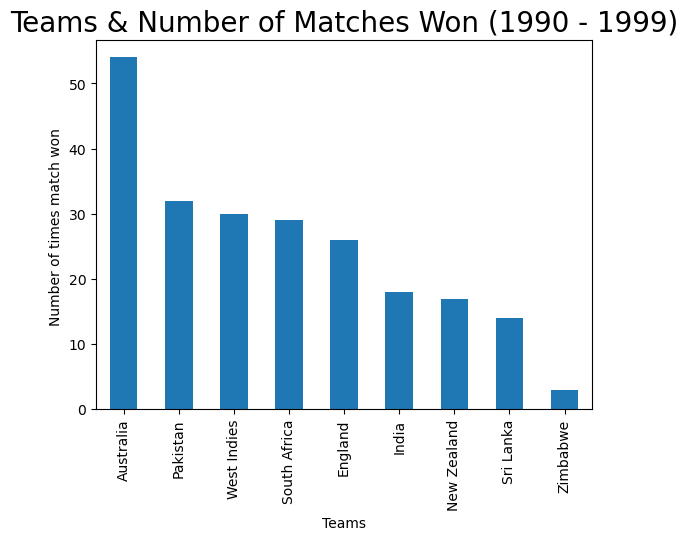

In [103]:
decade1990["Winner"].value_counts().plot(kind = "bar")
plt.xlabel("Teams")
plt.ylabel("Number of times match won ")
plt.title("Teams & Number of Matches Won (1990 - 1999)", fontsize = 20)
plt.show()

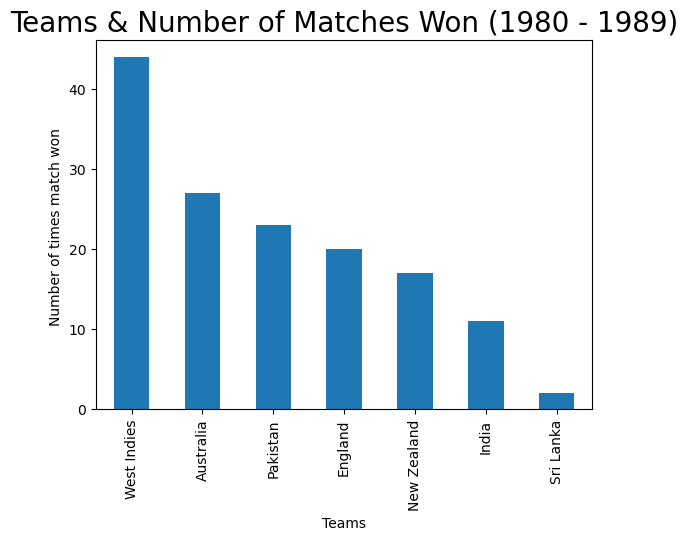

In [104]:
decade1980["Winner"].value_counts().plot(kind = "bar")
plt.xlabel("Teams")
plt.ylabel("Number of times match won ")
plt.title("Teams & Number of Matches Won (1980 - 1989)", fontsize = 20)
plt.show()

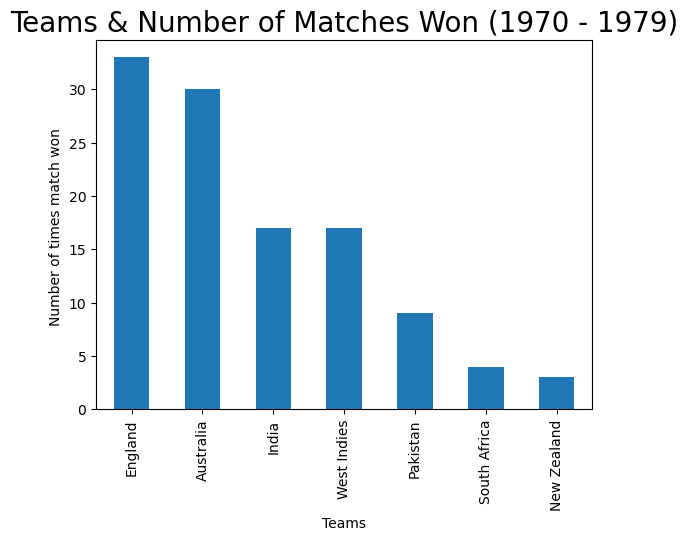

In [105]:
decade1970["Winner"].value_counts().plot(kind = "bar")
plt.xlabel("Teams")
plt.ylabel("Number of times match won ")
plt.title("Teams & Number of Matches Won (1970 - 1979)", fontsize = 20)
plt.show()

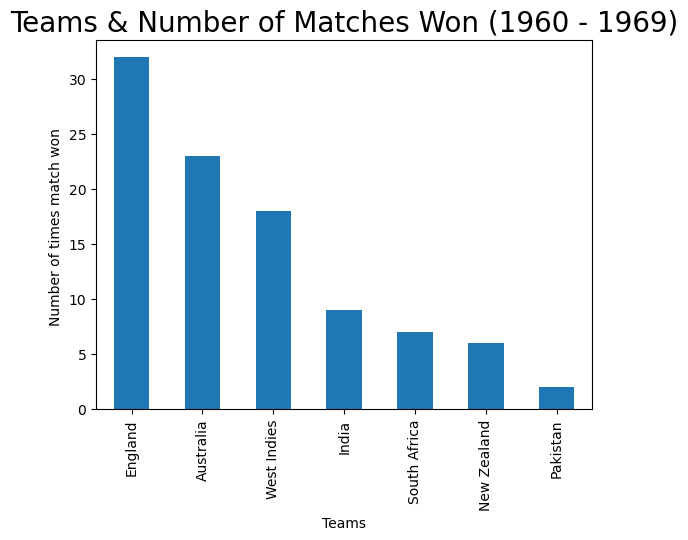

In [106]:
decade1960["Winner"].value_counts().plot(kind = "bar")
plt.xlabel("Teams")
plt.ylabel("Number of times match won ")
plt.title("Teams & Number of Matches Won (1960 - 1969)", fontsize = 20)
plt.show()

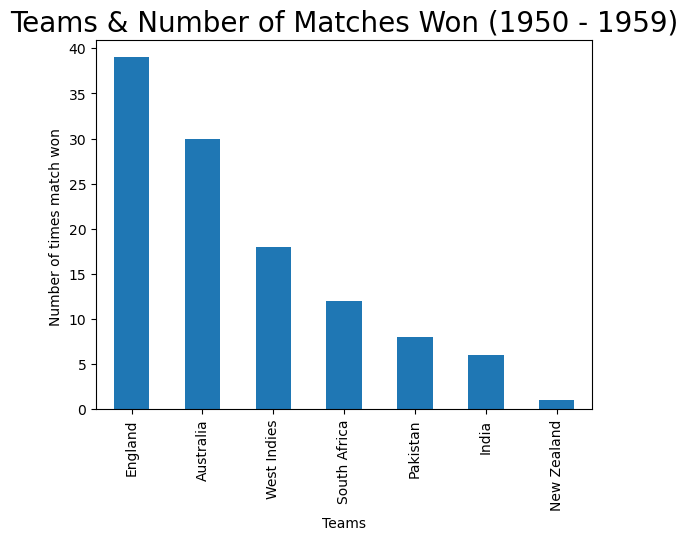

In [107]:
plt.show()
decade1950["Winner"].value_counts().plot(kind="bar")
plt.xlabel("Teams")
plt.ylabel("Number of times match won ")
plt.title("Teams & Number of Matches Won (1950 - 1959)", fontsize=20)
plt.show()

In [108]:
cricket_data

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format,Year,year_only,Victory Type,HomeTeamForm,AwayTeamForm
0,Australia,England,Australia,45 runs,Melbourne,"Mar 15-19, 1877",1,Test,1877-01-01,1877,Runs,0.500000,0.500000
1,Australia,England,England,4 wickets,Melbourne,"Mar 31-Apr 4, 1877",2,Test,1877-01-01,1877,Wickets,1.000000,0.000000
2,Australia,England,Australia,10 wickets,Melbourne,"Jan 2-4, 1879",3,Test,1879-01-01,1879,Wickets,0.500000,0.500000
3,England,Australia,England,5 wickets,The Oval,"Sep 6-8, 1880",4,Test,1880-01-01,1880,Wickets,0.333333,0.666667
4,Australia,England,Australia,5 wickets,Sydney,"Feb 17-21, 1882",6,Test,1882-01-01,1882,Wickets,0.500000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1782,Pakistan,West Indies,Pakistan,127 runs,Multan,"Jan 17-19, 2025",2577,Test,2025-01-01,2025,Runs,0.400000,0.200000
1783,Pakistan,West Indies,West Indies,120 runs,Multan,"Jan 25-27, 2025",2578,Test,2025-01-01,2025,Runs,0.600000,0.200000
1784,Sri Lanka,Australia,Australia,inns & 242 runs,Galle,"Jan 29-Feb 1, 2025",2579,Test,2025-01-01,2025,Runs,0.600000,0.800000
1785,Sri Lanka,Australia,Australia,9 wickets,Galle,"Feb 6-9, 2025",2580,Test,2025-01-01,2025,Wickets,0.400000,0.800000


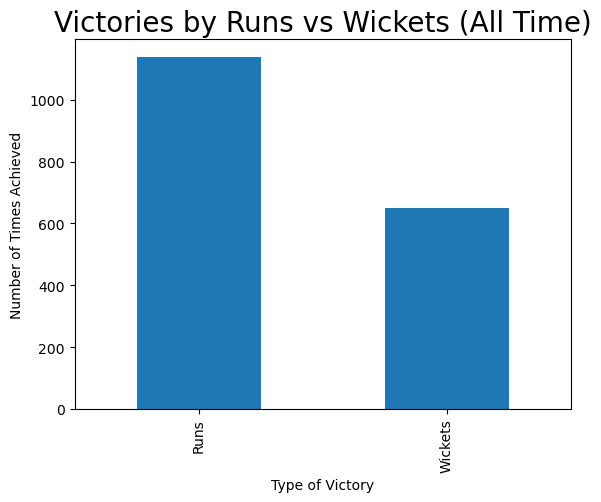

In [109]:
plt.show()
cricket_data["Victory Type"].value_counts().plot(kind="bar")
plt.xlabel("Type of Victory")
plt.ylabel("Number of Times Achieved")
plt.title("Victories by Runs vs Wickets (All Time)", fontsize=20)
plt.show()

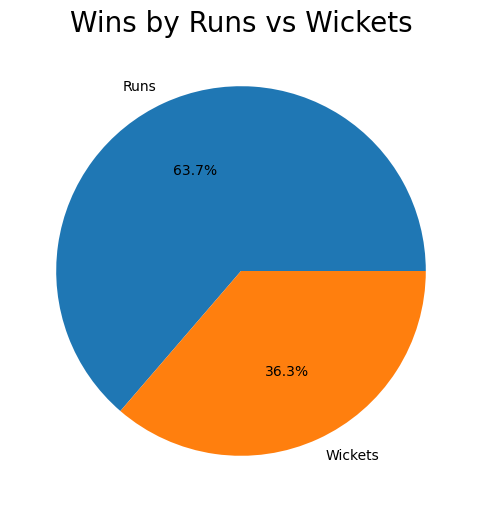

In [110]:
category_counts = cricket_data['Victory Type'].value_counts()
category_counts.plot.pie(autopct='%1.1f%%', figsize=(6, 6))
plt.title('Wins by Runs vs Wickets', fontsize=20)
plt.ylabel('') # Remove default 'category' label for cleaner look
plt.show()

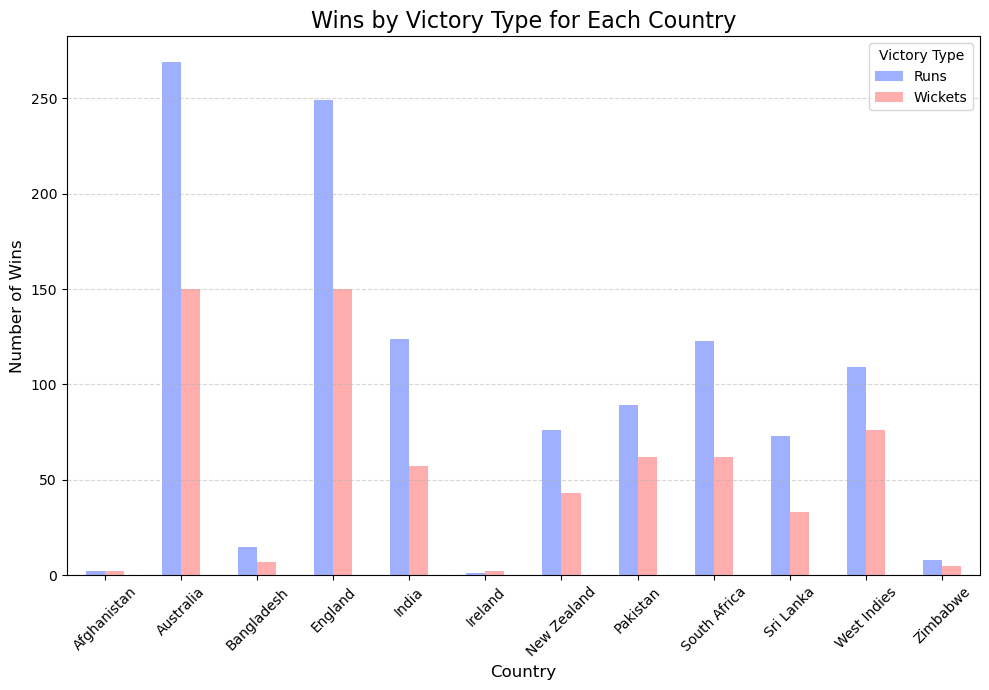

In [111]:
# Group by Country and Victory Type, then count the occurrences
#Counts the wins of each type
victory_counts = cricket_data.groupby(['Winner', 'Victory Type']).size().unstack(fill_value=0)

#Bar Graph Size
fig, ax = plt.subplots(figsize=(10, 7))

# Creating Bar Graph
victory_counts.plot(kind='bar', stacked=False, ax=ax, cmap='berlin')

#Labels and Title
ax.set_title('Wins by Victory Type for Each Country', fontsize=16)
ax.set_xlabel('Country', fontsize=12)
ax.set_ylabel('Number of Wins', fontsize=12)
ax.tick_params(axis='x', rotation=45) # Rotate x-axis labels for better visibility if many countries
ax.legend(title='Victory Type')
plt.grid(axis='y', linestyle='--', alpha=0.5) # Gridlines for an easier reading of values
plt.tight_layout() # Layout adjustment to space out labels

# Display the plot
plt.show()

In [112]:
modern

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format,Year,year_only,Victory Type,HomeTeamForm,AwayTeamForm
911,Australia,India,Australia,inns & 141 runs,Sydney,"Jan 2-4, 2000",1481,Test,2000-01-01,2000,Runs,1.0,0.4
912,South Africa,England,South Africa,inns & 37 runs,Cape Town,"Jan 2-5, 2000",1482,Test,2000-01-01,2000,Runs,1.0,0.2
913,South Africa,England,England,2 wickets,Centurion,"Jan 14-18, 2000",1483,Test,2000-01-01,2000,Wickets,1.0,0.2
914,India,South Africa,South Africa,4 wickets,Wankhede,"Feb 24-26, 2000",1484,Test,2000-01-01,2000,Wickets,0.2,0.8
915,Pakistan,Sri Lanka,Sri Lanka,2 wickets,Rawalpindi,"Feb 26-Mar 1, 2000",1485,Test,2000-01-01,2000,Wickets,0.4,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1782,Pakistan,West Indies,Pakistan,127 runs,Multan,"Jan 17-19, 2025",2577,Test,2025-01-01,2025,Runs,0.4,0.2
1783,Pakistan,West Indies,West Indies,120 runs,Multan,"Jan 25-27, 2025",2578,Test,2025-01-01,2025,Runs,0.6,0.2
1784,Sri Lanka,Australia,Australia,inns & 242 runs,Galle,"Jan 29-Feb 1, 2025",2579,Test,2025-01-01,2025,Runs,0.6,0.8
1785,Sri Lanka,Australia,Australia,9 wickets,Galle,"Feb 6-9, 2025",2580,Test,2025-01-01,2025,Wickets,0.4,0.8


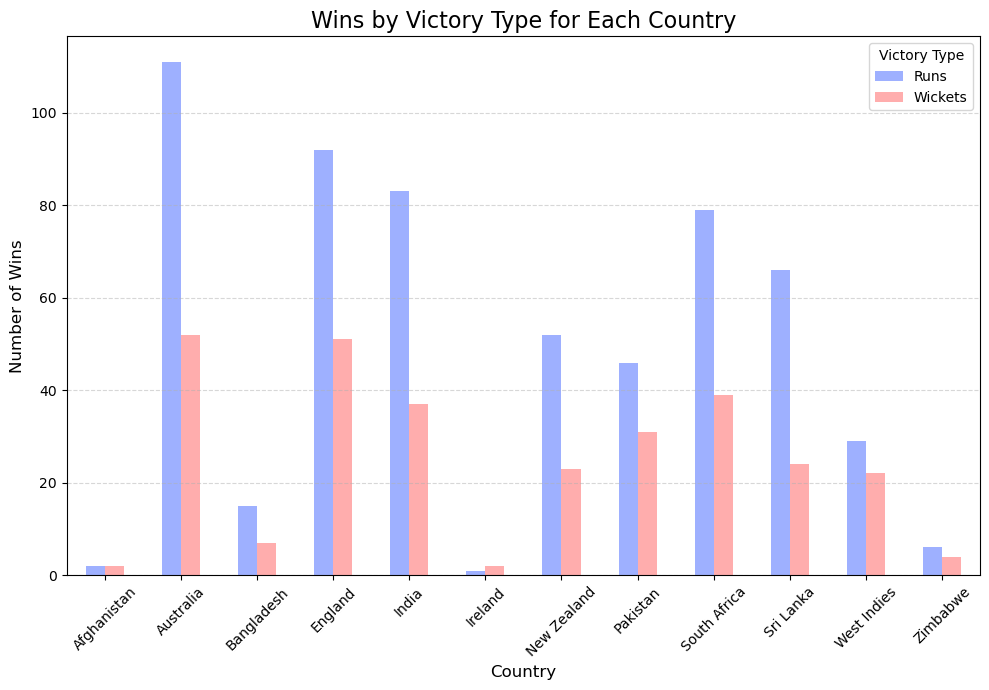

In [113]:
# Group by Country and Victory Type, then count the occurrences
#Counts the wins of each type
victory_counts = modern.groupby(['Winner', 'Victory Type']).size().unstack(fill_value=0)

#Bar Graph Size
fig, ax = plt.subplots(figsize=(10, 7))

# Creating Bar Graph
victory_counts.plot(kind='bar', stacked=False, ax=ax, cmap='berlin')

#Labels and Title
ax.set_title('Wins by Victory Type for Each Country', fontsize=16)
ax.set_xlabel('Country', fontsize=12)
ax.set_ylabel('Number of Wins', fontsize=12)
ax.tick_params(axis='x', rotation=45) # Rotate x-axis labels for better visibility if many countries
ax.legend(title='Victory Type')
plt.grid(axis='y', linestyle='--', alpha=0.5) # Gridlines for an easier reading of values
plt.tight_layout() # Layout adjustment to space out labels

# Display the plot
plt.show()

In [114]:
modern['Batted_First'] = np.where(modern['Victory Type'] == 'Runs',
                               modern['Winner'],
                               np.where(modern['Winner'] == modern['Team 1'],
                                        modern['Team 2'],
                                        modern['Team 1']))

C:\Users\Pranay Krishna\AppData\Local\Temp\ipykernel_18640\1941096159.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modern['Batted_First'] = np.where(modern['Victory Type'] == 'Runs',


In [115]:
modern

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Format,Year,year_only,Victory Type,HomeTeamForm,AwayTeamForm,Batted_First
911,Australia,India,Australia,inns & 141 runs,Sydney,"Jan 2-4, 2000",1481,Test,2000-01-01,2000,Runs,1.0,0.4,Australia
912,South Africa,England,South Africa,inns & 37 runs,Cape Town,"Jan 2-5, 2000",1482,Test,2000-01-01,2000,Runs,1.0,0.2,South Africa
913,South Africa,England,England,2 wickets,Centurion,"Jan 14-18, 2000",1483,Test,2000-01-01,2000,Wickets,1.0,0.2,South Africa
914,India,South Africa,South Africa,4 wickets,Wankhede,"Feb 24-26, 2000",1484,Test,2000-01-01,2000,Wickets,0.2,0.8,India
915,Pakistan,Sri Lanka,Sri Lanka,2 wickets,Rawalpindi,"Feb 26-Mar 1, 2000",1485,Test,2000-01-01,2000,Wickets,0.4,0.8,Pakistan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1782,Pakistan,West Indies,Pakistan,127 runs,Multan,"Jan 17-19, 2025",2577,Test,2025-01-01,2025,Runs,0.4,0.2,Pakistan
1783,Pakistan,West Indies,West Indies,120 runs,Multan,"Jan 25-27, 2025",2578,Test,2025-01-01,2025,Runs,0.6,0.2,West Indies
1784,Sri Lanka,Australia,Australia,inns & 242 runs,Galle,"Jan 29-Feb 1, 2025",2579,Test,2025-01-01,2025,Runs,0.6,0.8,Australia
1785,Sri Lanka,Australia,Australia,9 wickets,Galle,"Feb 6-9, 2025",2580,Test,2025-01-01,2025,Wickets,0.4,0.8,Sri Lanka


In [116]:
features = ['Team 1', 'Team 2', 'HomeTeamForm', 'AwayTeamForm']
X = modern[features]
y = modern['Winner']

In [117]:
X_encoded = pd.get_dummies(X, columns=features, drop_first=False)

In [118]:
#Splitting the Data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.4, random_state=0)

In [119]:
classifier = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=5, random_state=0)

In [120]:
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, random_state=0)

In [121]:
y_pred = classifier.predict(X_test) #Test data predictions

In [122]:
y_pred_training = classifier.predict(X_train) #Training Data predictions

In [123]:
training_accuracy = accuracy_score(y_train, y_pred_training)
print(f"Training Accuracy: {training_accuracy:.3f}") #Rounds to two decimals

Training Accuracy: 0.745


In [124]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.3f}") #Rounds to two decimals

Model Accuracy: 0.670


In [125]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=False)) #Displays accuracies for each team


Classification Report:
              precision    recall  f1-score   support

 Afghanistan       0.00      0.00      0.00         3
   Australia       0.81      0.63      0.71        70
  Bangladesh       0.67      0.33      0.44         6
     England       0.70      0.64      0.67        59
       India       0.84      0.79      0.82        48
     Ireland       0.00      0.00      0.00         1
 New Zealand       0.46      0.82      0.59        28
    Pakistan       0.62      0.50      0.56        30
South Africa       0.74      0.75      0.74        52
   Sri Lanka       0.52      0.79      0.63        29
 West Indies       0.54      0.68      0.60        19
    Zimbabwe       0.00      0.00      0.00         6

    accuracy                           0.67       351
   macro avg       0.49      0.50      0.48       351
weighted avg       0.68      0.67      0.66       351



In [126]:
print("\nClassification Report (Training Data):")
print(classification_report(y_train, y_pred_training, zero_division=False)) #Displays accuracies for each team


Classification Report (Training Data):
              precision    recall  f1-score   support

 Afghanistan       0.00      0.00      0.00         1
   Australia       0.84      0.77      0.80        93
  Bangladesh       0.83      0.31      0.45        16
     England       0.68      0.75      0.72        84
       India       0.78      0.74      0.76        72
     Ireland       0.00      0.00      0.00         2
 New Zealand       0.77      0.85      0.81        47
    Pakistan       0.67      0.64      0.65        47
South Africa       0.76      0.82      0.79        66
   Sri Lanka       0.69      0.84      0.76        61
 West Indies       0.74      0.72      0.73        32
    Zimbabwe       0.00      0.00      0.00         4

    accuracy                           0.74       525
   macro avg       0.56      0.54      0.54       525
weighted avg       0.74      0.74      0.74       525



In [127]:
feature_importances = classifier.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_encoded.columns,  # Use the column names from the encoded DataFrame
    'Importance': feature_importances
})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importances
print("Feature Importances:")
print(feature_importance_df)

Feature Importances:
                            Feature  Importance
1                  Team 1_Australia    0.173344
3                    Team 1_England    0.118286
8               Team 1_South Africa    0.109913
4                      Team 1_India    0.107093
9                  Team 1_Sri Lanka    0.088292
6                Team 1_New Zealand    0.081302
13                 Team 2_Australia    0.038633
20                  Team 2_Pakistan    0.035876
7                   Team 1_Pakistan    0.029292
17                     Team 2_India    0.027129
15                   Team 2_England    0.025527
10               Team 1_West Indies    0.025032
21              Team 2_South Africa    0.020836
22                 Team 2_Sri Lanka    0.017381
37                 AwayTeamForm_0.6    0.009158
31                 HomeTeamForm_0.8    0.008509
19               Team 2_New Zealand    0.007980
35                 AwayTeamForm_0.4    0.007616
26                 HomeTeamForm_0.2    0.007615
38                 

In [128]:
team_a = input("Home Team: ")
team_b = input("Away Team: ")

condition1 = (modern['Team 1'] == team_a) & (modern['Team 2'] == team_b)
condition2 = (modern['Team 1'] == team_b) & (modern['Team 2'] == team_a)

# This selects rows where either condition1 or condition2 is True
combined_condition = condition1 | condition2

# New dataframe with conditions met
new_match_data = modern[combined_condition].copy()
new_match_data.sort_values(by = 'Scorecard', ascending = False)

#Features
features = ['Team 1', 'Team 2', 'HomeTeamForm', 'AwayTeamForm']
X = new_match_data[features]
y = new_match_data['Winner']

X_encoded = pd.get_dummies(X, columns=features, drop_first=False)

#Splitting the Data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=0)

#classifier
classifier = RandomForestClassifier(n_estimators=1000, max_depth=10, min_samples_leaf=10, random_state=0)
classifier.fit(X_train, y_train)

#Predictions
y_pred = classifier.predict(X_test)  #Test data predictions
y_pred_training = classifier.predict(X_train)  #Training Data predictions
training_accuracy = accuracy_score(y_train, y_pred_training)

print(f"Training Accuracy: {training_accuracy:.3f}")  #Rounds to 3 decimals
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.3f}")  #Rounds to 3 decimals
print("\n--------------------------------------\n")


#Calculating the probability for a single current match
new_match = pd.DataFrame({
    'Team 1': [team_a],
    'Team 2': [team_b],
    'HomeTeamForm': new_match_data['HomeTeamForm'].iloc[-1],
    'AwayTeamForm': new_match_data['AwayTeamForm'].iloc[-1],
})


# One-hot encode the new match data, ensuring consistent columns with training data
new_match_encoded = pd.get_dummies(new_match, columns=features, drop_first=False)
new_match_encoded = new_match_encoded.reindex(columns=X_encoded.columns, fill_value=0)

# Get the probability of each team winning
probabilities = classifier.predict_proba(new_match_encoded)[0] # Get the probabilities for the first (and only) sample
class_labels = classifier.classes_ # Get the class labels in the order of probabilities

# Extract the names of the teams playing in the current match
team1 = new_match['Team 1'].iloc[0]
team2 = new_match['Team 2'].iloc[0]

print("Probability of winning for the teams in the match:\n")
for i, team_name in enumerate(class_labels):
    #if team_name == team1 or team_name == team2:
    print(f"{team_name}: {probabilities[i]*100:.2f}%")

Training Accuracy: 0.667
Model Accuracy: 1.000

--------------------------------------

Probability of winning for the teams in the match:

Sri Lanka: 66.22%
West Indies: 33.78%
